In [21]:
# แยกว่าเป็นผลไม้ชนิดไหน


In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

In [23]:
# X คือ Feature คือคุณลักษนะเด่น ตย. นี้คือขนาด
X = [
    [27],
    [35],
    [39],
    [21],
    [22],
    [45],
]
y_name = ['lemon', 'orange', 'orange', 'lemon', 'lemon', 'orange']
y = [0, 1, 1, 0, 0, 1]  # y คือ Class/Target/Label หรือ Output


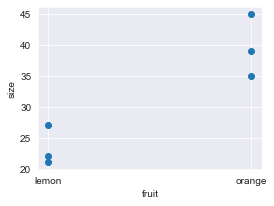

In [24]:
plt.figure(figsize=(4, 3))
plt.xlabel('fruit')
plt.ylabel('size')
plt.scatter(y_name, X)
plt.show()

In [25]:
model = DecisionTreeClassifier()
model.fit(X, y)  # train ด้วยข้อมูล

DecisionTreeClassifier()

In [26]:
# prediction หรือ ทำนาย

data = [[25]]  # input
y_predict = model.predict(data)
print('Result = ', y_predict)

Result =  [0]


In [27]:
# แสดง result ในรูปแบบของ string
class_names = ['lemon', 'orange']
print('Result =', class_names[y_predict[0]])

Result = lemon


In [28]:
# input แบบหลายค่า
data = [
    [32],
    [25],
    [21],
    [38],
    [11],
    [70],
    [41],
]

y_predict = model.predict(data)
for i in y_predict:
    print('Result =', class_names[i])

Result = orange
Result = lemon
Result = lemon
Result = orange
Result = lemon
Result = orange
Result = orange


In [29]:
# สร้างเป็น diagram
import pydotplus
from sklearn.tree import  export_graphviz
from IPython.display import Image

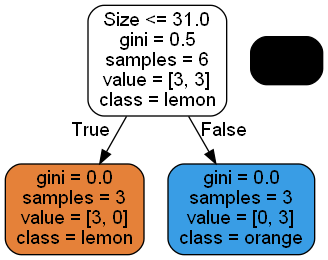

In [30]:
data_feature_names = ['Size']
fruit_types = ['lemon', 'orange']

# สร้างข้อมูล dot_data จากตัวแปร model ข้อมูลนี้จะเอาไป plot เป็น graph
dot_data = export_graphviz(model,
                           out_file=None,
                           feature_names=data_feature_names,
                           class_names=fruit_types,
                           filled=True,rounded=True
                           )

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('tree-fruit.png')
Image(graph.create_png())

# gini = 0.5 คือ gini เป็นอัลกอริทึมที่ใช้ในการคำนวณเพื่อเลือกว่าจะให้อะไรเป็นเกณฑ์การ แบ่งคัดแยกกลุ่ม \n (เลือก Feature หรือคุณลักษณะเด่นที่ดีที่สุดมาเป็นตัวคัดแยก) ในกรณีนี้ ใช้ size เป็น root ในการแบ่งกลุ่ม ค่า 0.5 คือดัชนี gini \n (gini ค่ามากแสดงว่าข้อมูลมีกลุ่ม ปะปนกัน ถ้าค่าเป็นศูนย์แสดงว่าข้อมูลเป็นกลุ่มเดียวกันหมด ไม่มีกลุ่มอื่นปะปน หรือใน ทางเทคนิค เรียกว่าข้อมูลเป็นกลุ่มเดียวกันทั้งหมด เช่น ข้อมูลเป็นมะนาวทั้งหมด ฯลฯ